In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

C:\Users\Acer\AppData\Local\Temp\ipykernel_3624\1790973436.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Acer\AppData\Local\Temp\ipykernel_3624\3225621068.py:1: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv('dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')


<div style="background-color:red; color:white; font-family:'Poppins'; font-size:40px; border-radius:10px; padding:30px; text-align:center;">1 | Exploratory Data Analysis </div>

<div style="background-color:white; color:red; font-family:'Poppins'; font-size:20px; border-radius:10px; padding:20px; ">Bivariate Analysis </div>

In [3]:
df_clean = df[['Attrition', 'Department', 'Gender', 'Age', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany']]

In [4]:
df_clean.head()

,Attrition,Department,Gender,Age,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,YearsAtCompany
0,Yes,Sales,Female,41,2,4,5993,6
1,No,Research & Development,Male,49,3,2,5130,10
2,Yes,Research & Development,Male,37,4,3,2090,0
3,No,Research & Development,Female,33,4,3,2909,8
4,No,Research & Development,Male,27,1,2,3468,2


In [5]:
def sampling(df, col, ratio=0.1):
    classes = np.unique(df[col])
    count = int(len(df) * ratio)
    indices = []
    for cls in classes:
        index = df[df[col] == cls].index.tolist()
        np.random.shuffle(index)
        indices.append(index[:count])
    return indices
        
indices = [index for index_list in sampling(df, 'Attrition', ratio=0.2) for index in index_list]
indices[:5]

[352, 768, 417, 1426, 1356]

In [6]:
df_clean = df_clean.loc[indices]
df_clean.shape 

(531, 8)

the data after sampling has `531` instances

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 352 to 813
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                531 non-null    object
 1   Department               531 non-null    object
 2   Gender                   531 non-null    object
 3   Age                      531 non-null    int64 
 4   EnvironmentSatisfaction  531 non-null    int64 
 5   JobSatisfaction          531 non-null    int64 
 6   MonthlyIncome            531 non-null    int64 
 7   YearsAtCompany           531 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 37.3+ KB


the dataset is dominated with numeric cols

In [8]:
numeric_data = df_clean.select_dtypes(include='number')
object_data = df_clean.select_dtypes(include='object')
print(f'Num cols: {len(numeric_data.columns)}')
print(f'Obj cols: {len(object_data.columns)}')

Num cols: 5
Obj cols: 3


<div style="background-color:white; color:red; font-family:'Poppins'; font-size:20px; border-radius:10px; padding:20px; ">Bivariate Analysis </div>

In [9]:
plt.rcParams['figure.figsize'] = (15, 10)

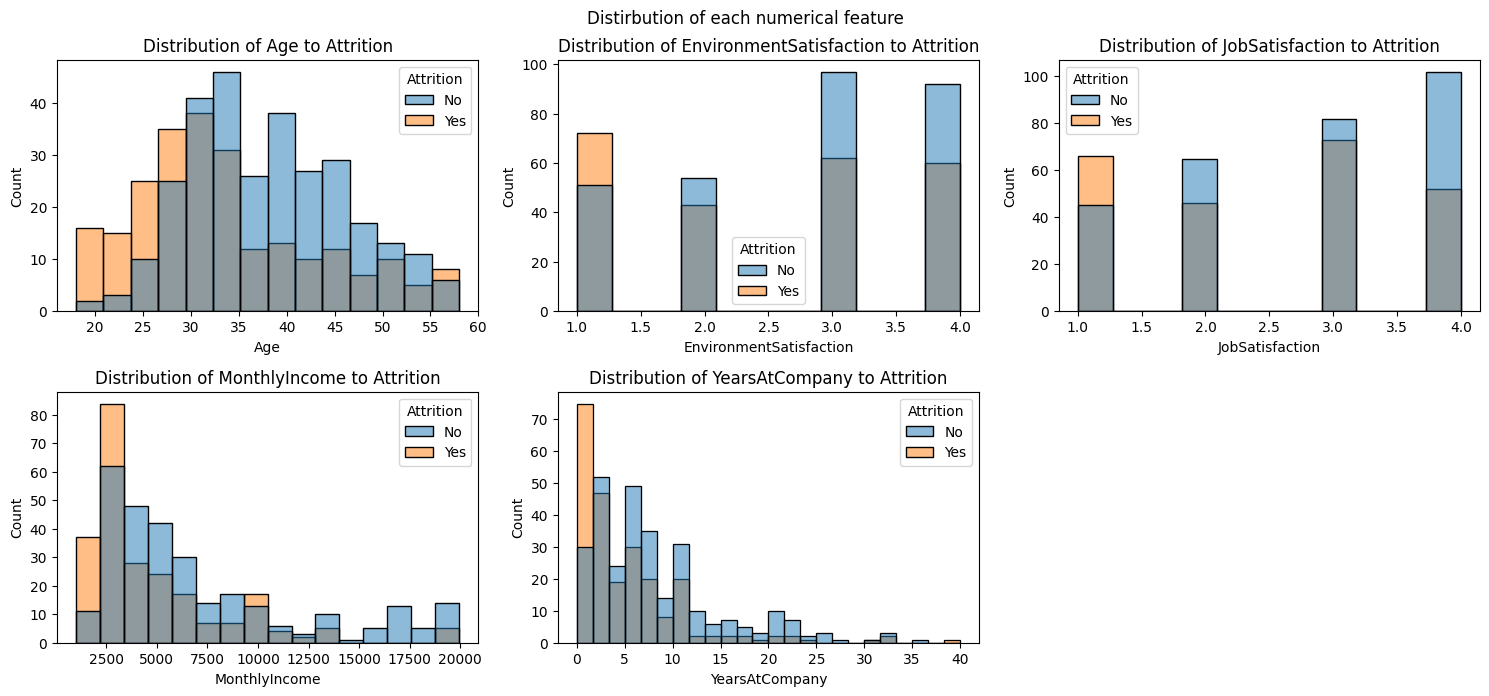

In [10]:
for i, col in enumerate(numeric_data):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=numeric_data[col], hue=df_clean['Attrition'])
    plt.title(f"Distribution of {col} to Attrition")

plt.suptitle(t="Distirbution of each numerical feature", fontsize=12)
plt.tight_layout()
plt.show()


## **Insight of Distribution Histogram Plot 🔬**
- `YearsAtCompany` and `MontlyIncome` have same pattern that left skew, it mean there dominated employee with low `YearsAtCompany` have low `MontlyIncome`
- while Age Attrtion Yes is dominated in age below 35

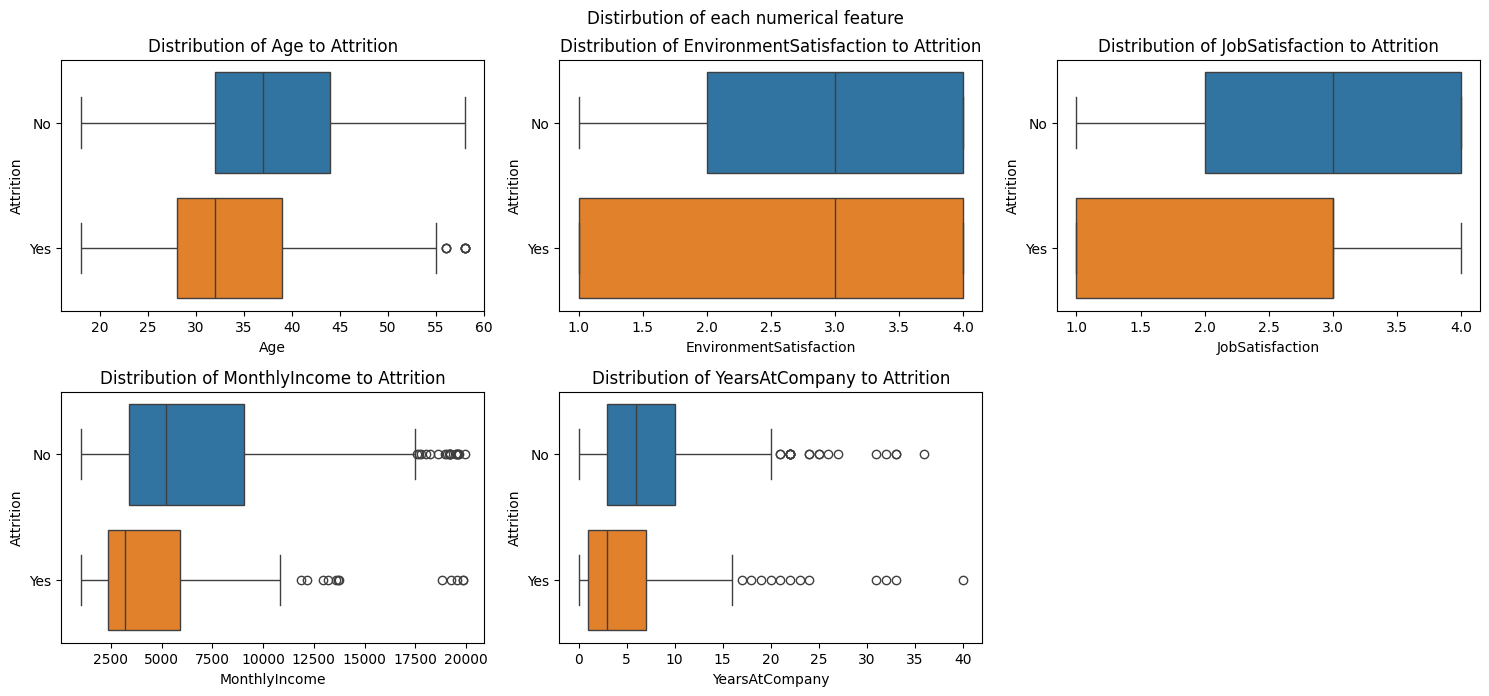

In [11]:
for i, col in enumerate(numeric_data):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df_clean['Attrition'], x=numeric_data[col], hue=df_clean['Attrition'])
    plt.title(f"Distribution of {col} to Attrition")

plt.suptitle(t="Distirbution of each numerical feature", fontsize=12)
plt.tight_layout()
plt.show()


## **Insight of Numerical Columns 🔬**
- in columns of `Age`, `MonthlyIncome` and `YearsCompony` have same pattern, the Attrition of Yes is dominiated in low `Age`, `MonthlyIncome` and `YearsCompony` while it not significant
- while `JobSatisfication` have characteristic of very diverse, the lower employee `JobSatisfacation`, emloye Yess for attrition, and high the statification emloyee no for Attrition
- but on `EnvirimentSatstication` it quite normal distribute, it mean `EnvirimentSatstication` not significant effect to the emloyee Attrition


In [12]:
crosstab1 = pd.crosstab( object_data['Attrition'],object_data['Department'])

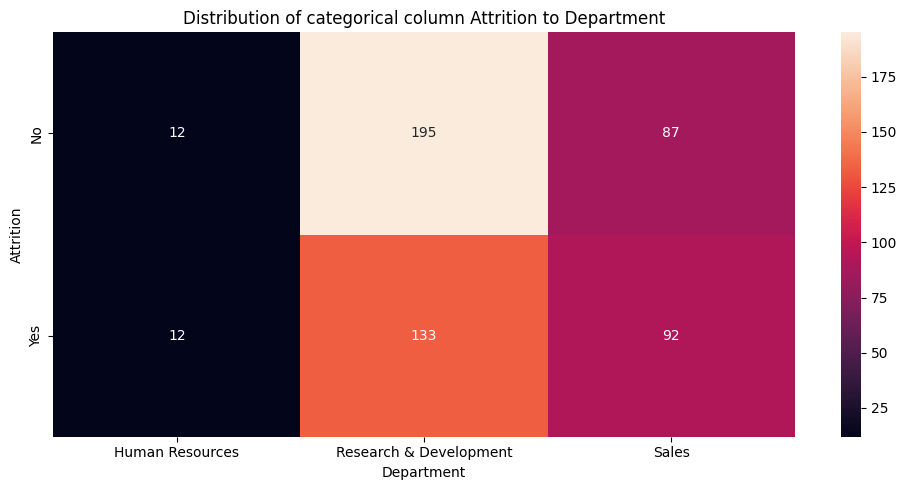

In [13]:
plt.figure(figsize=(10, 5))
plt.title("Distribution of categorical column Attrition to Department")
sns.heatmap(crosstab1, annot=True, fmt="d")
plt.tight_layout()

### **Important Insight of Categorical Attrition to Department 🔬**
- Department human resource have equl Attrition 
- while R&D Deoartment dominated contine work or No Attrition, this effect because the R7D need a long time research
- and sales is dominated not continue it might be because the have short time contract trend of depanrtment


In [14]:
crosstab2 = pd.crosstab( object_data['Attrition'],object_data['Gender'])

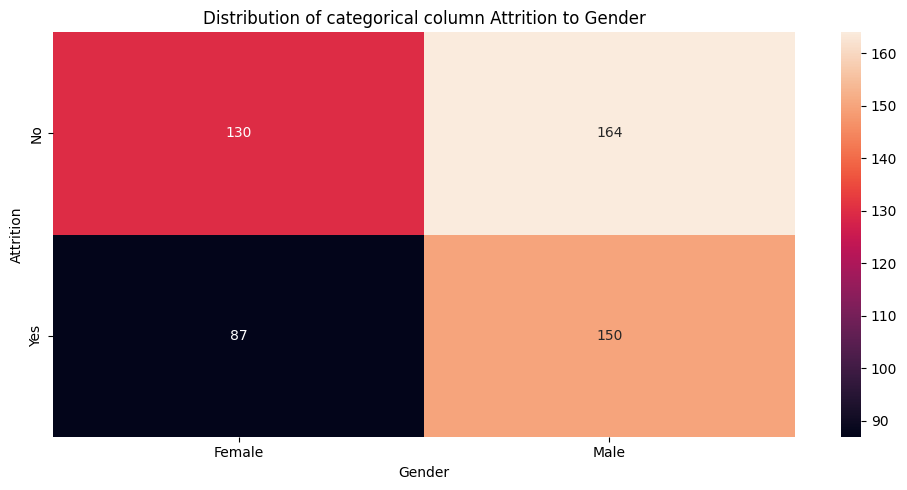

In [15]:
plt.figure(figsize=(10, 5))
plt.title("Distribution of categorical column Attrition to Gender")
sns.heatmap(crosstab2, annot=True,  fmt="d")
plt.tight_layout()

### **Important Insight of Categorical Attrition to Gender 🔬**
- Most of female & Male continue working but not highly significant different

## **Conclusion and Key Insight**

Characteristic of Attrition Yes:
- Low Age, Low Mothly Income, Low Years At Company and Low Job Satification
- Male or female not effectting to attrition
- Department R&D is most Atrtion Yes, and Sales is opposite of r&D


<div style="background-color:white; color:red; font-family:'Poppins'; font-size:20px; border-radius:10px; padding:20px; ">Tree Visualization </div>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, deque
from matplotlib.patches import Patch, ConnectionPatch

class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode
        self.palette = self._create_color_palette()
        self.node_cache = {}
        self._cache_nodes(tree.root)
        
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))
    
    def _calculate_impurity(self, y):
        return self._calculate_gini(y) if self.mode == 'gini' else self._calculate_entropy(y)
    
    def _calculate_entropy(self, y):
        total = len(y)
        return -sum((c/total)*np.log2(c/total) for c in Counter(y).values())
        
    def _calculate_gini(self, y):
        total = len(y)
        return 1 - sum((c/total)**2 for c in Counter(y).values())
    
    def _cache_nodes(self, root):
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if getattr(node, 'left', None):
                queue.extend([node.left, node.right])
    
    def get_prediction_path(self, x):
        path, decisions = [], []
        node = self.tree.root
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            val_str = f"{feature_val:.2f}" if isinstance(feature_val, (int, float)) else str(feature_val)
            thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
            op = "≤" if feature_val <= node.threshold else ">"
            decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {val_str} {op} {thresh_str}")
            node = node.left if feature_val <= node.threshold else node.right
        path.append(node)
        decisions.append(f"Final: Class {node.value}")
        return path, decisions
    
    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        fig = fig or plt.figure(figsize=(8,8))
        ax = ax or fig.add_subplot(111)
        ax.clear(); ax.set_axis_off()
    
        node_width, node_height, level_height = 0.15, 0.1, 0.2
        node_boxes, path_ids = {}, {}
    
        def get_node_positions(node, level=0, x_pos=0.5):
            pos = {id(node):(x_pos, 1 - level*level_height)}
            if getattr(node, 'left', None):
                spacing = 0.25/(level+1)
                pos.update(get_node_positions(node.left, level+1, x_pos-spacing))
                pos.update(get_node_positions(node.right, level+1, x_pos+spacing))
            return pos
    
        node_positions = get_node_positions(self.tree.root)
        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = {id(n) for n in prediction_path}
    
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, node_id in path_ids)
            else:
                self._draw_decision_node(node_ax, node, node_id in path_ids)
    
        self._draw_connections(node_positions, node_boxes, path_ids, ax)
    
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.2), title="Classes")
    
        if x is not None:
            title = (f"Decision Tree Path - Step {step} of {len(decisions)}"
                     if step is not None else f"Complete Decision Path\nFinal Prediction: Class {self.tree.predict([x])[0]}")
        else:
            title = f"Complete Decision Tree Visualization\nImpurity Measure: {self.mode.capitalize()}"
        fig.suptitle(title, fontsize=12)
        return fig, ax
    
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        edge_color, lw = ('red', 2) if is_active else ('black', 1)
        dist = Counter(node.sample)
        txt = f"Class {node.value}\n" + "\n".join(f"Class {k}: {v}" for k, v in dist.items())
        txt += f"\n{'Gini' if self.mode=='gini' else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}"
        bg_color = self.palette[max(dist, key=dist.get)]
        ax.text(0.5, 0.5, txt, ha='center', va='center',
                bbox=dict(boxstyle="round", fc=(*bg_color, 0.3), ec=edge_color, linewidth=lw),
                fontsize=8)
    
    def _draw_decision_node(self, ax, node, is_active):
        edge_color, lw = ('red', 2) if is_active else ('black', 1)
        sns.histplot(data=self.data_df, x=self.feature_names[node.feature_index],
                     hue=self.target_col, palette=self.palette, multiple="stack", ax=ax)
        ax.set(xlabel='', ylabel='')
        ax.axvline(node.threshold, color=edge_color, linestyle='--', linewidth=lw)
        if ax.get_legend(): ax.get_legend().remove()
        dist = Counter(node.sample)
        thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
        title = (f"{self.feature_names[node.feature_index]} <= {thresh_str}\n" +
                 " ".join(f"{k}:{v}" for k, v in dist.items()) +
                 f"\n{'Gini' if self.mode=='gini' else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}")
        ax.set_title(title, fontsize=8, color=edge_color)
    
    def _draw_connections(self, positions, boxes, path_ids, main_ax):
        for node_id, _ in positions.items():
            node = self.node_cache[node_id]
            if getattr(node, 'left', None):
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, boxes, is_active, main_ax)
    
    def _draw_connection(self, parent, child, boxes, is_active, main_ax):
        color, width = ('red', 2) if is_active else ('black', 1)
        p_box, c_box = boxes[id(parent)], boxes[id(child)]
        con = ConnectionPatch(xyA=(p_box[0] + p_box[2]/2, p_box[1]),
                              xyB=(c_box[0] + c_box[2]/2, c_box[1] + c_box[3]),
                              coordsA="figure fraction", coordsB="figure fraction",
                              axesA=main_ax, axesB=main_ax,
                              arrowstyle="->", color=color, linewidth=width)
        main_ax.add_artist(con)


In [17]:
from collections import deque, Counter
from matplotlib.patches import Patch, ConnectionPatch

In [18]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None, sample=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left 
        self.right = right
        self.info_gain = info_gain
        self.value = value 
        self.sample = sample 

In [19]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=3, min_sample_split=2, min_sample_leaf=1, features=None, mode='gini'):
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
        self.min_sample_leaf = min_sample_leaf
        self.features = features
        self.mode = mode 

        self.root = None
        self.feature_importance = None 

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape 

        features = np.arange(n_features)
        if self.features != None:
            features = self.features

        if n_samples>=self.min_sample_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, n_samples, features)

            if best_split['info_gain']>0 and len(best_split['dataset_left'])>=self.min_sample_leaf and len(best_split['dataset_right'])>=self.min_sample_leaf:
                feature_index = best_split['feature_index']

                self.feature_importance[0][feature_index] += best_split['info_gain']
                self.feature_importance[1][feature_index] += 1

                left_subtree = self.build_tree(best_split['dataset_left'], curr_depth+1)
                right_subtree = self.build_tree(best_split['dataset_right'], curr_depth+1)
                return Node(
                    feature_index=feature_index, threshold=best_split['threshold'], left=left_subtree, right=right_subtree, info_gain=best_split['info_gain'], sample=Y
                )
        leaf_value = self.calc_leaf_value(Y)
        return Node(value=leaf_value, sample=Y)
    
    def get_best_split(self, dataset, n_samples, features):
        best_split = {}
        max_info_gain = -float('inf')

        for feature_index in features:
            possible_thresholds = np.unique(dataset[:, feature_index])
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)

                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]

                    curr_info_gain = self.information_gain(y, left_y, right_y, self.mode)

                    if curr_info_gain > max_info_gain:
                        best_split = {
                            'feature_index': feature_index,
                            'threshold': threshold,
                            'dataset_left': dataset_left,
                            'dataset_right': dataset_right,
                            'info_gain': curr_info_gain,
                        }
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
    
    def calc_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    


    """INFORMATION GAIN"""
    def information_gain(self, parent, l_child, r_child, mode):
        l_weight = len(l_child) / len(parent)
        r_weight = len(r_child) / len(parent)
        if mode == 'gini':
            gain = self.gini(parent) - (l_weight*self.gini(l_child) + r_weight*self.gini(r_child))
        elif mode == 'entropy':
            gain = self.entropy(parent) - (l_weight*self.entropy(l_child) + r_weight*self.entropy(r_child))
        return gain 
    
    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = len(y[y==cls]) / len(y)
            entropy += -p_cls * np.log(p_cls)
        return entropy
    
    def gini(self, y):
        classes = np.unique(y)
        gini = 0
        for cls in classes:
            p_cls = len(y[y==cls]) / len(y)
            gini += p_cls ** 2
        return 1-gini
    


    """POST PRUNING"""
    def reduced_error_pruning(self, X_test, y_test, tree):
        if tree.left and tree.right:
            self.reduced_error_pruning(X_test, y_test, tree.left)
            self.reduced_error_pruning(X_test, y_test, tree.right)

            if tree.left.value != None and tree.right.value != None:
                accuracy_before = np.mean(self.predict(X_test) == y_test)
                tree.value = self.calc_leaf_value(y_test)
                accuracy_pruned = np.mean(self.predict(X_test) == y_test)

                if accuracy_pruned > accuracy_before:
                    tree.left = None
                    tree.right = None 
                else:
                    tree.value = None

    def cost_complexity_pruning(self, alpha=0.01, tree=None):
        if tree is None:
            tree = self.root 

        if tree.left and tree.right:
            self.cost_complexity_pruning(alpha, tree.left)
            self.cost_complexity_pruning(alpha, tree.right)

            left_cost = self._calc_subtree_cost(tree.left)
            right_cost = self._calc_subtree_cost(tree.right)

            if (left_cost + right_cost - 1) * alpha >= tree.info_gain:
                tree.value = self.calc_leaf_value([leaf.value for leaf in self._get_leaves(tree)])
                tree.left = tree.right = None 
        return tree 

    def _get_leaves(self, tree=None):
        if tree.value is not None:
            return [tree]
        return self._get_leaves(tree.left) + self._get_leaves(tree.right)
    
    def _calc_subtree_cost(self, tree=None):
        if tree is None:
            return 0
        
        if tree.value is not None:
            y = np.array(tree.sample)
            if self.mode == 'gini':
                self.gini(y)
            else:
                self.entropy(y)

        left_cost = self._calc_subtree_cost(tree.left)
        right_cost = self._calc_subtree_cost(tree.right)
        return left_cost + right_cost + 1



    """FIT AND PREDICT"""
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.feature_importance = np.zeros([2, X.shape[1]+1])
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.make_predictions(x, self.root) for x in X]
        return predictions
    
    def make_predictions(self, x, tree=None):
        if tree.value is not None:
            return tree.value 
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_predictions(x, tree.left)
        else:
            return self.make_predictions(x, tree.right)
        

    
    """LEAF INFO"""
    def get_leaf_all_info(self, tree=None, node_id=0, leaf_info=None):
        if leaf_info is None:
            leaf_info = {}

        if tree is None:
            tree = self.root 

        if tree.value is not None:
            count = Counter(tree.sample)
            ratio = {k: round(v / len(count)) for k, v in count.items()}
            leaf_info[node_id] = ratio
            return leaf_info
        
        self.get_leaf_all_info(tree.left, node_id * 2 + 1, leaf_info)
        self.get_leaf_all_info(tree.right, node_id * 2 + 2, leaf_info)
        return leaf_info
    
    def get_leaf_info(self, x, tree=None, node_id=0):
        if tree is None:
            tree = self.root

        if tree.value is not None:
            count = Counter(tree.sample)
            ratio = {k: round(v / len(count)) for k, v in count.items()}
            return node_id, ratio
        
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.get_leaf_info(x, tree.left, node_id * 2 + 1)
        else:
            return self.get_leaf_info(x, tree.right, node_id * 2 + 2)


In [20]:
def accuracy_score(y_test, y_pred):
    return np.mean(y_test == y_pred) * 100

def cross_validation(X, y, model, k=5, pruning=False, alpha=0.0):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    accuracies = []

    for i in range(k):
        test_start = i * fold_size
        test_end = test_start + fold_size if i < k -1 else n_samples 
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train.reshape(-1, 1))

        if pruning=='rep':
            model.reduced_error_pruning(X_test, y_test, model.root)
        elif pruning=='ccp':
            model.cost_complexity_pruning(alpha)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    data = {
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test,
        'y_pred': y_pred, 'test_indices':test_indices, 'train_indices':train_indices,
        'accuracies':accuracies
    }

    return data 

In [21]:
def encoding(df, cols):
    for col in cols:
        df[col] = df[col].astype('category').cat.codes
    return df 

df_clean = encoding(df_clean, object_data.columns.tolist())
df_clean.head()

,Attrition,Department,Gender,Age,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,YearsAtCompany
352,0,2,0,48,1,3,12504,0
768,0,2,1,40,3,1,8396,7
417,0,2,0,40,3,3,18041,20
1426,0,1,0,32,3,2,2837,6
1356,0,2,0,41,3,2,4393,5


In [22]:
class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode
        self.node_cache = {}
        self.pallete = self._create_color_pallete()
        self._cache_nodes(tree.root)

    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = len(y[y==cls]) / len(y)
            entropy += -p_cls * np.log(p_cls)
        return entropy
    
    def gini(self, y):
        classes = np.unique(y)
        gini = 0
        for cls in classes:
            p_cls = len(y[y==cls]) / len(y)
            gini += p_cls ** 2
        return 1-gini
    
    def _create_color_pallete(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))

    def _calculate_impurity(self, y):
        return self.gini(y) if self.mode == 'gini' else self.entropy(y)
    
    def _cache_nodes(self, root):
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_chace[id(node)] = node
            if getattr(node,'left', None):
                queue.extend([node.left, node.right])

    def get_prediction_path(self, x):
        path, decisions = [], []
        node = self.tree.node
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            val_str = f'{feature_val:.2f}' if isinstance(feature_val, (int, float)) else str(feature_val)
            thresh_val = f'{node.threshold:.2f}' if isinstance(node.threshold, (int, float)) else str(node.threshold)
            op = '<=' if feature_val <= node.threshold else ">"
            decisions.append(f"Step {len(path)}: {self.feature_names[node.threshold]} = {val_str} {op} {thresh_val}")
            node = node.left if feature_val <= node.threshold else node.right
        path.append(node)
        decisions.append(f'Final: Class {node.value}')
        return path, decisions
    
    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        fig = fig or plt.figure(figsize=(8, 8))
        ax = ax or fig.add_subplot(111)
        ax.clear(); ax.set_axis_off()

        node_width, node_height, level_height = 0.15, 0.1, 0.2
        node_boxes, path_ids = {}, {}

        def get_node_positions(node, level=0, x_pos=0.5):
            pos = {id(node):(x_pos, 1-level*level_height)}
            if getattr(node, 'left', None):
                spacing = 0.25/(level+1)
                pos.update(get_node_positions(node.left, level+1, x_pos-spacing))
                pos.update(get_node_positions(node.right, level+1, x_pos-+spacing))
            return pos
        node_positions = get_node_positions(self.tree.root)
        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = {id(n) for n in prediction_path}
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height, node_width, node_height ]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height, node_width, node_height ])
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, node_id in path_ids)
            else:
                self._draw_decision_node(node_ax, node, node_id in path_ids)
        
        self._draw_connections(node_positions, node_boxes, path_ids, ax)

        legend_elements = [
            Patch(facecolor=self.pallete[cls], alpha=0.3, label=cls) 
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.2), title="Classes ")

        if x is not None:
            title = (f'Decision Tree Path - Step {step} of {len(decisions)}' if step is not None else f"Complate Decision Patj\nFinal Prediction: Class {self.tree.predict([x])[0]}")
        else:
            title = f'Complate Decision Tree Visualization\nImpurity Mearsure: {self.mode.capitalize()}'
        fig.suptitle(title, fontsize=14, y=0.7)
        return fig, ax
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        color, width = ('red', 2) if is_active else ('black', 1)
        dist = Counter(node.sample)
        txt = f'Class {node.value}\n' + '\n'.join(f"Class {k}: {v}" for k, v in dist.items())
        txt += f'\n{"Gini" if self.mode=="gini" else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}'
        bg_color = self.pallete[max(dist, key=dist.get)]
        ax.text(0.5, 0.5, txt, ha='center', va='center', bbox=dict(boxstyle='round', fc=(*bg_color, 0.3), ec=color, linewidth=width), fontsize=8)
    
    def _draw_decision_node(self, ax, node, is_active):
        color, width = ('red', 2) if is_active else ('black', 1)
        sns.histplot(data=self.data_df, x=self.feature_names[node.feature_index],
                     hue=self.target_col, palette=self.pallete, multiple='stack', ax=ax)
        ax.set(x_label='', y_label=0)
        ax.axvline(node.threshold, color=color, linestyle='--', linewidth=width)
        if ax.get_legend(): ax.get_legend().remove()
        dist = Counter(node.sample)
        thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
        title = (f'{self.feature_names[node.feature_index]} <= {thresh_str} \n' +
                 ' '.join(f"Class {k}: {v}" for k, v in dist.items()) +
                 f'\n{"Gini" if self.mode=="gini" else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}')
        ax.set_title(title, fontsize=8, color=color)
    
    def _draw_connections(self, position, boxes, path_ids, main_ax):
        for node_id, _ in position.items():
            node = self.node_cache[node_id]
            if getattr(node, 'left', None):
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, boxes, is_active, main_ax)
    
    def _draw_connection(self, parent, child, boxes, is_active, main_ax):
        color, width = ('red', 2) if is_active else ('black', 1)
        p_box, c_box = boxes[id(parent)], boxes[id(child)]
        con = ConnectionPatch(xyA=(p_box[0] + p_box[2]/2, p_box[1]),
                              xyB=(c_box[0] + c_box[2]/2, c_box[1], c_box[3] ),
                              coordsA='figure fraction', coordsB='figure fraction',
                              axesA=main_ax, axesB=main_ax,
                              arrowstyle="->", color=color, linewidth=width
                              )
        main_ax.add_artist(con)


In [23]:
feature_names = ['Department','Gender','Age','EnvironmentSatisfaction','JobSatisfaction','MonthlyIncome','YearsAtCompany']
target_col = 'Attrition'

X = df_clean.iloc[feature_names].values
Y = df_clean.iloc[target_col].values

model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=0, features=None, mode='gini')
data = cross_validation(X, Y, model, k=5, pruning=False, alpha=0.0)

data_df = pd.DataFrame(df_clean, columns=feature_names)
data_df[target_col] = df_clean[target_col].flatten()

viz = TreeVisualization(model, data_df=data_df, target_col=target_col, feature_names=feature_names )

ValueError: invalid literal for int() with base 10: 'Department'

p
p

In [ ]:
def classification_report(y_pred, y_test):
    accuracy = np.mean(y_pred == y_test)
    classes = np.unique(y_test)
    report_data = []

    for cls in classes:
        # predicted as right is right
        TP = np.sum((y_pred == cls) & (y_test == cls))
        # predicted as right is actually not
        FP = np.sum((y_pred == cls) & (y_test != cls))
        # predicted as other class actually right
        FN = np.sum((y_pred != cls) & (y_test != cls))

        # ratio of the right among the predicted right (ex: 80% right 20% others are predicted right but actualy not)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0 
        # ratio of the right among the predicted correctly (ex: 70% right 30% others are predicted as other class but actualy right)
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        f1_score = 2 * (precision * recall)
        data = [cls, precision, recall, f1_score]
        report_data.append(data)
    
    report_df = pd.DataFrame(report_data, columns=['class', 'precision', 'recall', 'f1 score'])
    report_df['accuracy'] = ['-', accuracy]
    return report_df

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class TkinterApp:
    def __init__(self, root):
        self.root = root
        self.root.attributes('-fullscreen', True)
        self.root.title("Employer Attrition Prediction App")

        self.tab_control = ttk.Notebook(root)
        self.predict_tab = ttk.Frame(self.tab_control, padding="30")
        self.history_tab = ttk.Frame(self.tab_control, padding="30")
        self.setting_tab = ttk.Frame(self.tab_control, padding="30")

        ttk.Style().configure('TNotebook.tab', font=('Poppins', 20), padding="30 10 30 10")
        self.tab_control.add(self.predict_tab, text="Predict Tab")
        self.tab_control.add(self.history_tab, text="History Tab")
        self.tab_control.add(self.setting_tab, text="Setting Tab")
        self.tab_control.pack(anchor='w', fill='x')

        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
    # Department	Gender	Age	EnvironmentSatisfaction	JobSatisfaction	MonthlyIncome	YearsAtCompany
    def init_predict_tab(self):
        ttk.Label(self.predict_tab, text="Reward Employee App", font=('Poppins', 32)).grid(column=0, row=0,sticky='w')
        ttk.Label(self.predict_tab, text="Input your type of emplyee and make it consideration", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')
        
        self.frame_input = ttk.Frame(self.predict_tab)
        self.frame_input.grid(column=0, row=2)

        ttk.Label(self.frame_input, text="Deparment").grid(column=0, row=3)
        self.department_entry = ttk.Entry()
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        canvas = FigureCanvasTkAgg(self.fig, self.predict_tab)
        canvas.draw()
        canvas.get_tk_widget().grid(column=0, row=4)

    def predict_and_plot(self):
        self.fig.clf()
        departments = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 0}
        gender = {'Female': 0, 'Male': 1}
        new_instance = np.array(
            [departments[self.department_select], 
             gender[self.gender_select], 
             self.age_enty, 
             self.environment_satisfaction_entry, 
             self.job_satisfaction_entry.get(), 
             self.monthly_income_entry, 
             self.years_at_company_entry]
            )

        feature_names = ['Department', 'Gender', 'Age', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany']
        target_col = 'Attrition'

        X = df_clean[feature_names].values
        Y = df_clean[target_col].values

        model = DecisionTreeClassifier(max_depth=self.max_depth_entry, min_sample_split=self.min_sample_split_entry, min_sample_leaf=self.min_sample_leaf_entry,  mode=self.mode_entry)
        data = cross_validation(X, Y, model, k=5, pruning=self.post_pruning, alpha=self.alpha_entry)

        data_df = pd.DataFrame(data['X_train'], columns=feature_names)
        data_df[target_col] = data['y_train'].flatten()

        viz = TreeVisualization(model, data_df=data_df, target_col=target_col, feature_names=feature_names)
        viz.plot_prediction_path(new_instance, step=self.step)

    def update_plot(self):
        print("predict")


    def init_history_tab(self):
        ttk.Label(self.history_tab, text="History and Compare", font=('Poppins', 32)).grid(column=0, row=0,sticky='w')
        ttk.Label(self.history_tab, text="Check History and compare the performance model", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')

    def init_setting_tab(self):
        ttk.Label(self.setting_tab, text="Adjust your best setting", font=('Poppins', 32)).grid(column=0, row=0,sticky='w')
        ttk.Label(self.setting_tab, text="by default, model setting is in best performance", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')
        

if __name__ == "__main__":
    root = tk.Tk()
    app = TkinterApp(root)
    root.mainloop()


SyntaxError: invalid syntax (2392375280.py, line 35)